In [1]:
from IPython.core.display import Markdown, display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
plt.rcParams['axes.axisbelow'] = True

import sys
import os
from os import path

from plot_in_out_dist import plot_in_out_dist

out_dir = "thesis_plots/composition_example"
if not path.exists(out_dir):
    os.makedirs(out_dir)

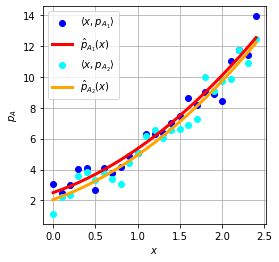

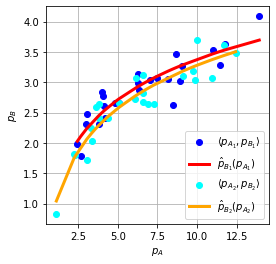

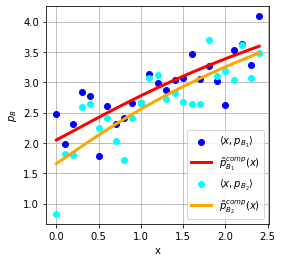

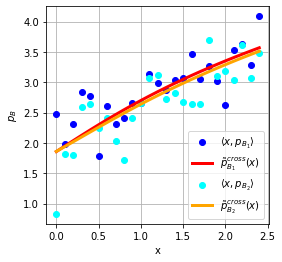

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

t_x_p_A = lambda x: 1 + (1 + x)**2
t_p_A_x = lambda p_A: np.sqrt(p_A - 1) - 1

t_p_A_p_B = lambda p_A: np.log(p_A) + 1
t_p_B_p_A = lambda p_B: np.exp(p_B - 1)

d1 = pd.DataFrame({'x1': np.arange(0.0, 2.5, 0.1), 'x2': np.arange(0.0, 2.5, 0.1)})
np.random.seed(0)
d1['p_A1'] = t_x_p_A(d1.x1) + np.random.normal(0.0, 0.6, len(d1.x1))
d1['p_A2'] = t_x_p_A(d1.x2) + np.random.normal(0.0, 0.6, len(d1.x2))
np.random.seed(0)
d1['p_B1'] = t_p_A_p_B(d1.p_A1) + np.random.normal(0.0, 0.2, len(d1.p_A1))
d1['p_B2'] = t_p_A_p_B(d1.p_A2) + np.random.normal(0.0, 0.2, len(d1.p_A2))

# A1

d1_A1 = d1.sort_values(by='x1')
x1 = d1_A1.x1.values
model_A1 = LinearRegression().fit(t_x_p_A(x1.reshape(-1, 1)), d1_A1.p_A1)
p_A1_est = model_A1.predict(t_x_p_A(x1.reshape(-1, 1)))

# A2

d1_A2 = d1.sort_values(by='x2')
x2 = d1_A2.x2.values
model_A2 = LinearRegression().fit(t_x_p_A(x2.reshape(-1, 1)), d1_A2.p_A2)
p_A2_est = model_A2.predict(t_x_p_A(x2.reshape(-1, 1)))

# plot A1, A2

fig = plt.figure()
plt.grid()
plt.scatter(d1.x1, d1.p_A1, label=r'$\langle x, p_{A_1} \rangle$', color='blue')
plt.plot(x1, p_A1_est, linewidth=3, label='$\hat{p}_{A_1}(x)$', color='red')
plt.scatter(d1.x2, d1.p_A2, label=r'$\langle x, p_{A_2} \rangle$', color='cyan')
plt.plot(x2, p_A2_est, linewidth=3, label='$\hat{p}_{A_2}(x)$', color='orange')
plt.xlabel('$x$')
plt.ylabel('$p_{A}$')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-p_A12--linear-regression.pdf", bbox_inches='tight')
plt.show()

# B1

d1_B1 = d1.sort_values(by='p_A1')
p_A1 = d1_B1.p_A1.values
model_B1 = LinearRegression().fit(t_p_A_p_B(p_A1.reshape(-1, 1)), d1_B1.p_B1)
p_B1_est = model_B1.predict(t_p_A_p_B(p_A1.reshape(-1, 1)))

# B2

d1_B2 = d1.sort_values(by='p_A2')
p_A2 = d1_B2.p_A2.values
model_B2 = LinearRegression().fit(t_p_A_p_B(p_A2.reshape(-1, 1)), d1_B2.p_B2)
p_B2_est = model_B2.predict(t_p_A_p_B(p_A2.reshape(-1, 1)))

# plot B1, B2

fig = plt.figure()
plt.grid()
plt.scatter(d1.p_A1, d1.p_B1, label=r'$\langle p_{A_1}, p_{B_1} \rangle$', color='blue')
plt.plot(p_A1, p_B1_est, linewidth=3, label='$\hat{p}_{B_1}(p_{A_1})$', color='red')
plt.scatter(d1.p_A2, d1.p_B2, label=r'$\langle p_{A_2}, p_{B_2} \rangle$', color='cyan')
plt.plot(p_A2, p_B2_est, linewidth=3, label='$\hat{p}_{B_2}(p_{A_2})$', color='orange')
plt.xlabel('$p_A$')
plt.ylabel('$p_B$')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/p_A12-p_B12--linear-regression.pdf", bbox_inches='tight')
plt.show()

# A1 B1 comp, A2 B2 comp

p_A1_comp_est = model_A1.predict(t_x_p_A(x1.reshape(-1, 1)))
p_B1_comp_est = model_B1.predict(t_p_A_p_B(p_A1_comp_est.reshape(-1, 1)))

p_A2_comp_est = model_A2.predict(t_x_p_A(x2.reshape(-1, 1)))
p_B2_comp_est = model_B2.predict(t_p_A_p_B(p_A2_comp_est.reshape(-1, 1)))

# plot A1 B1 comp, A2 B2 comp

fig = plt.figure()
plt.grid()
plt.scatter(x1, d1.p_B1, label=r'$\langle x, p_{B_1} \rangle$', color='blue')
plt.plot(x1, p_B1_comp_est, linewidth=3, label=r"$\tilde{p}_{B_1}^{comp}(x)$", color='red')
plt.scatter(x2, d1.p_B2, label=r'$\langle x, p_{B_2} \rangle$', color='cyan')
plt.plot(x2, p_B2_comp_est, linewidth=3, label=r"$\tilde{p}_{B_2}^{comp}(x)$", color='orange')
plt.xlabel('x')
plt.ylabel('$p_B$')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-p_B12-comp--linear-regression.pdf", bbox_inches='tight')
plt.show()

# A1 B2 comp, A2 B1 comp

p_A1_comp_est = model_A1.predict(t_x_p_A(x1.reshape(-1, 1)))
p_B2_comp_est = model_B2.predict(t_p_A_p_B(p_A1_comp_est.reshape(-1, 1)))

p_A2_comp_est = model_A2.predict(t_x_p_A(x2.reshape(-1, 1)))
p_B1_comp_est = model_B1.predict(t_p_A_p_B(p_A2_comp_est.reshape(-1, 1)))

# plot A1 B2 comp, A2 B1 comp

fig = plt.figure()
plt.grid()
plt.scatter(x1, d1.p_B1, label=r'$\langle x, p_{B_1} \rangle$', color='blue')
plt.plot(x1, p_B1_comp_est, linewidth=3, label=r"$\tilde{p}_{B_1}^{cross}(x)$", color='red')
plt.scatter(x2, d1.p_B2, label=r'$\langle x, p_{B_2} \rangle$', color='cyan')
plt.plot(x2, p_B2_comp_est, linewidth=3, label=r"$\tilde{p}_{B_2}^{cross}(x)$", color='orange')
plt.xlabel('x')
plt.ylabel('$p_B$')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-p_B12-cross-comp--linear-regression.pdf", bbox_inches='tight')
plt.show()
